In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

In [3]:
elle_jisu = pd.read_csv('./blackpink/elle_Ji.csv', sep='|', encoding = 'utf-8')
cosmo_jisu = pd.read_csv('./blackpink/cosmo_Ji.csv', sep='|', encoding = 'utf-8')
marie_jisu = pd.read_csv('./blackpink/marie_Ji.csv', sep='|', encoding = 'utf-8')

## 전처리

### 기호삭제

In [4]:
# ce_dw['word_celine'] = ce_dw['word_celine'].str.replace('[', '').str.replace(']', '').str.replace('\\', '').str.replace('"', '').str.replace("'", "").str.replace('「', '').str.replace('」', '').str.replace('”', '').str.replace('‘', '').str.replace('“', '')

## list(article_list) 생성 후 append

In [5]:
contents_list = []

In [6]:
mag_jisu = [elle_jisu, cosmo_jisu, marie_jisu]

In [7]:
magazine_list = []
article_list = []
for magazine in mag_jisu:
    articles = magazine['word_jisu']
    for article in articles:
        article_list.append(article)

In [8]:
len(article_list)

73

## 트위터 패키지 안에 konlpy 모듈 호출

In [9]:
from konlpy.tag import Twitter

In [10]:
twitter = Twitter()

C:\Users\wnsgo\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### 각 문장별로 형태소 구분하기

In [11]:
sentences_tag = []

for sentence in article_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
    
    

print(len(sentences_tag))


73


In [12]:
sentences_tag[0]

[('["[[],', 'Punctuation'),
 ("['',", 'Punctuation'),
 ("'", 'Punctuation'),
 ('쇄골', 'Noun'),
 ('라인', 'Noun'),
 ('에', 'Josa'),
 ('걸리는', 'Verb'),
 ('진주', 'Noun'),
 ('목걸이', 'Noun'),
 ('의', 'Josa'),
 ('클래식', 'Noun'),
 ('한', 'Josa'),
 ('매력', 'Noun'),
 ('을', 'Josa'),
 ('캐치', 'Noun'),
 ('한', 'Josa'),
 ('제니', 'Noun'),
 ('.', 'Punctuation'),
 ('화이트', 'Noun'),
 ('셔츠', 'Noun'),
 ('와', 'Josa'),
 ('블랙', 'Noun'),
 ('컬러', 'Noun'),
 ('의', 'Josa'),
 ('테일러', 'Noun'),
 ('드', 'Noun'),
 ('재킷', 'Noun'),
 ('에', 'Josa'),
 ('진주', 'Noun'),
 ('목걸이', 'Noun'),
 ('를', 'Josa'),
 ('매치', 'Noun'),
 ('해', 'Verb'),
 ('세련되게', 'Adjective'),
 ('연출', 'Noun'),
 ('했습니다', 'Verb'),
 ('.', 'Punctuation'),
 ('진주', 'Noun'),
 ('주얼리', 'Noun'),
 ('에', 'Josa'),
 ('도전', 'Noun'),
 ('해보고', 'Verb'),
 ('싶다면', 'Verb'),
 ('어떤', 'Adjective'),
 ('룩', 'Noun'),
 ('에든', 'Josa'),
 ('자연', 'Noun'),
 ('스럽게', 'Josa'),
 ('어울리는', 'Verb'),
 ('간결한', 'Adjective'),
 ('진주', 'Noun'),
 ('목걸이', 'Noun'),
 ('부터', 'Josa'),
 ('시작', 'Noun'),
 ('해보세요', 'Verb'),
 (".'

In [13]:
twitter.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [14]:
verb_list = []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Verb']:
            verb_list.append(word)

In [15]:
verb_list[:20]

['걸리는',
 '해',
 '했습니다',
 '해보고',
 '싶다면',
 '어울리는',
 '해보세요',
 '내려오는',
 '긴',
 '했어요',
 '걸쳐지는',
 '감아',
 '할',
 '버리셔도',
 '맞는',
 '커',
 '잘',
 '늘어',
 '뜨려',
 '하세요']

### 1. 명사 혹은 형용사인 품사만 선별해 리스트에 담기

In [16]:
noun_adj_list= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun', 'Adjective', 'Alpha', 'Determiner', 'Foreign']:
            noun_adj_list.append(word)

In [17]:
len(noun_adj_list)

8532

In [18]:
noun_adj_list[:20]

['쇄골',
 '라인',
 '진주',
 '목걸이',
 '클래식',
 '매력',
 '캐치',
 '제니',
 '화이트',
 '셔츠',
 '블랙',
 '컬러',
 '테일러',
 '드',
 '재킷',
 '진주',
 '목걸이',
 '매치',
 '세련되게',
 '연출']

In [19]:
noun_adj_list[:10]

['쇄골', '라인', '진주', '목걸이', '클래식', '매력', '캐치', '제니', '화이트', '셔츠']

### 선별된 품사별 빈도수 계산 & 상위 빈도 10위까지 출력

In [20]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('지수', 139), ('‘', 104), ('것', 96), ('블랙', 95), ('핑크', 79), ('수', 67), ('때', 57), ('있는', 53), ('그', 49), ('모습', 46), ('디올', 45), ('리사', 42), ('제니', 41), ('「', 38), ('」', 38), ('컬러', 34), ('같아요', 34), ('매력', 33), ('이', 33), ('로제', 33), ('사람', 33), ('드', 32), ('스타일', 32), ('더', 31), ('모두', 31), ('생각', 31), ('까르띠', 30), ('어떤', 28), ('패턴', 28), ('저', 28), ('말', 28), ('파샤', 28), ('다른', 27), ('걸', 27), ('전', 26), ('벨트', 26), ('위', 25), ('무대', 25), ('있어요', 24), ('이번', 24), ('디자인', 23), ('거', 23), ('시간', 23), ('있다', 22), ('세훈', 22), ('요', 22), ('제', 22), ('가장', 21), ('활동', 21), ('우리', 21), ('마음', 21), ('엘르', 21), ('같은', 20), ('멤버', 20), ('연출', 19), ('룩', 19), ('세계', 19), ('자신', 19), ('의', 19), ('도전', 18), ('손흥민', 18), ('통해', 18), ('두', 17), ('백', 17), ('스타', 17), ('적', 17), ('모델', 17), ('건', 17), ('셔츠', 16), ('감', 16), ('포인트', 16), ('를', 16), ('그녀', 16), ('편이', 16), ('“', 16), ('”', 16), ('진주', 15), ('느낌', 15), ('프로젝트', 15), ('톱', 15), ('반전', 15), ('많은', 15), ('〉', 15), ('촬영', 15), ('안', 15),

In [21]:
# # 한 글자인 단어는 제외

# for i, v in enumerate(noun_adj_list):
#     if len(v)<2:
#         noun_adj_list.pop(i)

In [22]:
count = Counter(noun_adj_list)

In [23]:
word_list = count.most_common(200)
for v in word_list:
    print(v)

('지수', 139)
('‘', 104)
('것', 96)
('블랙', 95)
('핑크', 79)
('수', 67)
('때', 57)
('있는', 53)
('그', 49)
('모습', 46)
('디올', 45)
('리사', 42)
('제니', 41)
('「', 38)
('」', 38)
('컬러', 34)
('같아요', 34)
('매력', 33)
('이', 33)
('로제', 33)
('사람', 33)
('드', 32)
('스타일', 32)
('더', 31)
('모두', 31)
('생각', 31)
('까르띠', 30)
('어떤', 28)
('패턴', 28)
('저', 28)
('말', 28)
('파샤', 28)
('다른', 27)
('걸', 27)
('전', 26)
('벨트', 26)
('위', 25)
('무대', 25)
('있어요', 24)
('이번', 24)
('디자인', 23)
('거', 23)
('시간', 23)
('있다', 22)
('세훈', 22)
('요', 22)
('제', 22)
('가장', 21)
('활동', 21)
('우리', 21)
('마음', 21)
('엘르', 21)
('같은', 20)
('멤버', 20)
('연출', 19)
('룩', 19)
('세계', 19)
('자신', 19)
('의', 19)
('도전', 18)
('손흥민', 18)
('통해', 18)
('두', 17)
('백', 17)
('스타', 17)
('적', 17)
('모델', 17)
('건', 17)
('셔츠', 16)
('감', 16)
('포인트', 16)
('를', 16)
('그녀', 16)
('편이', 16)
('“', 16)
('”', 16)
('진주', 15)
('느낌', 15)
('프로젝트', 15)
('톱', 15)
('반전', 15)
('많은', 15)
('〉', 15)
('촬영', 15)
('안', 15)
('좋겠어요', 15)
('게', 15)
('라인', 14)
('매치', 14)
('팬츠', 14)
('워치', 14)
('등', 14)
('누군가', 

## 워드클라우드 만들기

In [24]:

import matplotlib.pyplot as plt

### 패키지 설치 및 폰트 어쩌구

In [25]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [26]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### wordcloud 그리기

In [27]:
from wordcloud import WordCloud

In [28]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

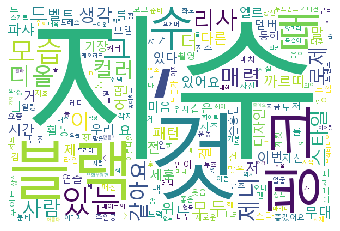

In [29]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('jisu_adj_twitter.png')